## Movie Recommendation system

## Loading the data

In [1]:
import pandas as pd
movies = pd.read_csv("movies.csv")
ratings=pd.read_csv('ratings.csv')

In [2]:
print(ratings.head())
print("\n\n")
print(movies.head())

   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510



   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


## Data Preprocessing

In [3]:
import re

def clean_title(title):
    title = re.sub("[^a-zA-Z0-9 ]", "", title)
    return title

In [4]:
movies["clean_title"] = movies["title"].apply(clean_title)

In [5]:
movies

,movieId,title,genres,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995
...,...,...,...,...
62418,209157,We (2018),Drama,We 2018
62419,209159,Window of the Soul (2001),Documentary,Window of the Soul 2001
62420,209163,Bad Poems (2018),Comedy|Drama,Bad Poems 2018
62421,209169,A Girl Thing (2001),(no genres listed),A Girl Thing 2001


In [6]:
print("Number of missing values in movies.csv",movies.isnull().sum())

Number of missing values in movies.csv movieId        0
title          0
genres         0
clean_title    0
dtype: int64


In [7]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [8]:
movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [9]:
#Counting the number of missing values in the datasets
print("Number of missing values in ratings.csv",ratings.isnull().sum())
print("Number of missing values in movies.csv",movies.isnull().sum())

Number of missing values in ratings.csv userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Number of missing values in movies.csv movieId        0
title          0
genres         0
clean_title    0
dtype: int64


## Exploratory Data Analysis

In [10]:
#Counting the number of genres

all_genres = movies['genres'].str.split('|')
flattened_genres = [genre for sublist in all_genres for genre in sublist]
distinct_genres = set(flattened_genres)

# Display distinct genres
print("Distinct Genres:")
print(distinct_genres)
print("Number of different genres: ",len(distinct_genres))

Distinct Genres:
{'Thriller', 'Action', 'Sci-Fi', 'Film-Noir', 'Drama', 'Mystery', 'War', 'Adventure', 'Fantasy', 'Western', 'Crime', 'Children', 'Horror', 'Documentary', 'Romance', 'Animation', 'IMAX', '(no genres listed)', 'Musical', 'Comedy'}
Number of different genres:  20


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

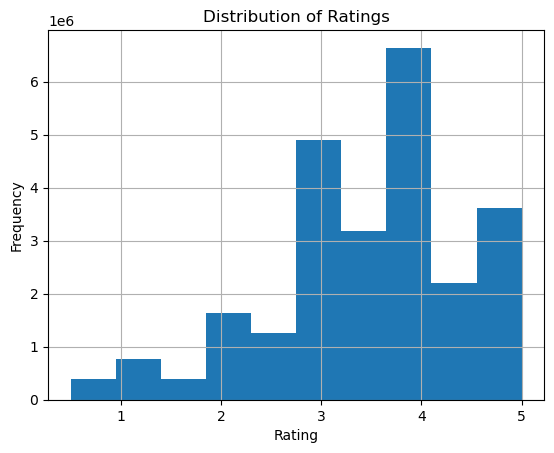

In [12]:
#Histogram of ratings
ratings['rating'].hist(bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


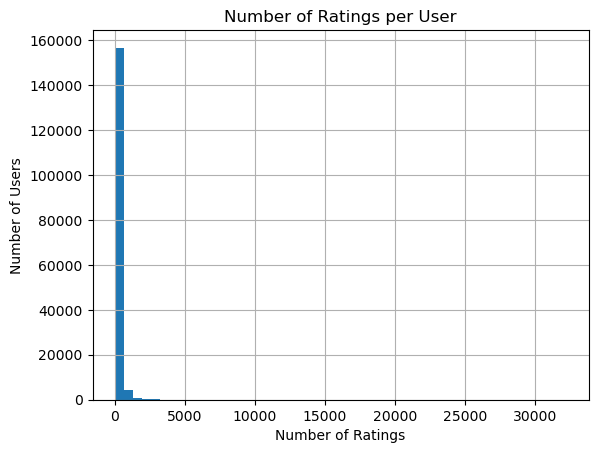

In [13]:
# Number of ratings per user
ratings_per_user = ratings.groupby('userId')['rating'].count()
ratings_per_user.hist(bins=50)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()


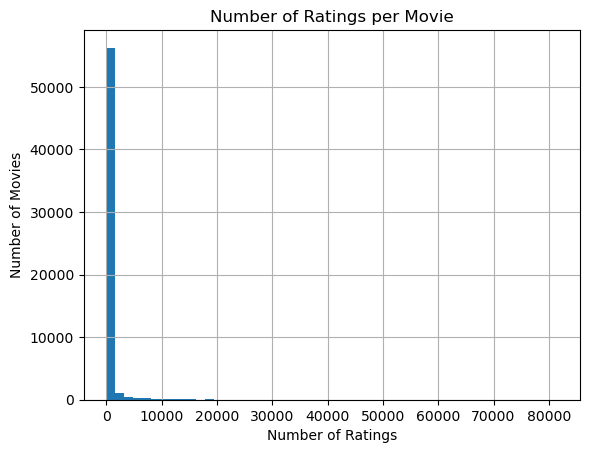

In [14]:
#number of ratings per movie
ratings_per_movie = ratings.groupby('movieId')['rating'].count()
ratings_per_movie.hist(bins=50)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()


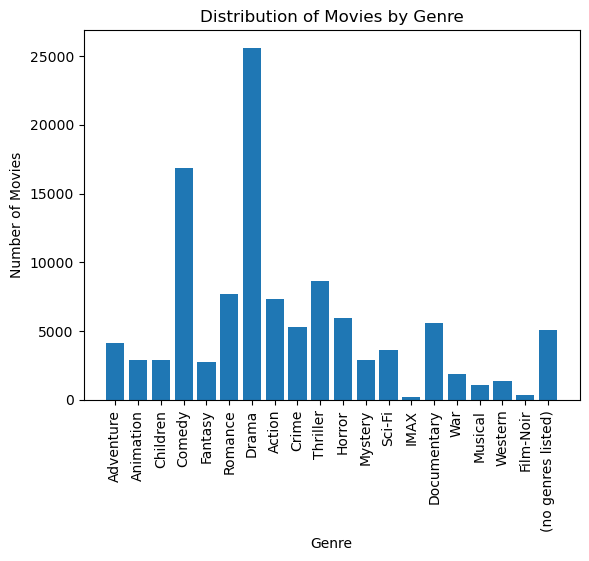

In [16]:
from collections import Counter
import numpy as np

all_genres = movies['genres'].str.split('|').sum()
genre_counts = Counter(all_genres)

plt.bar(genre_counts.keys(), genre_counts.values())
plt.xticks(rotation=90)
plt.title('Distribution of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()


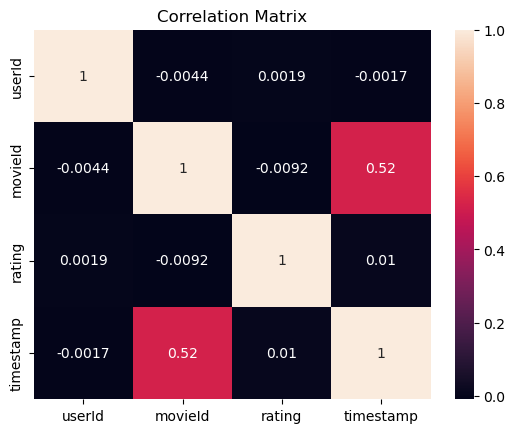

In [17]:
#correlation matrix
corr_matrix = ratings.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()
